# ToolBox Loading

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.metrics import *

#Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [4]:
data = pd.read_csv(r'C:\Users\USER1\Desktop\credit_card_churn.csv')
# Let’s observe the shape of our datasets.
print('train data shape :',data.shape)

train data shape : (10127, 23)


In [5]:
#checking first five rows in dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
#checking last five rows in dataset
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [7]:
#showing dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [8]:
#showing statistical description of dataset
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [9]:
data.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


# Data Cleaning

In [10]:
#checking for null values in train set
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [11]:
#checking for duplicates values in train set
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [12]:
#dropping irrelevant columns
data = data.drop(
['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
axis = 1)

# Exploratory Data Analysis 

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>]], dtype=object)

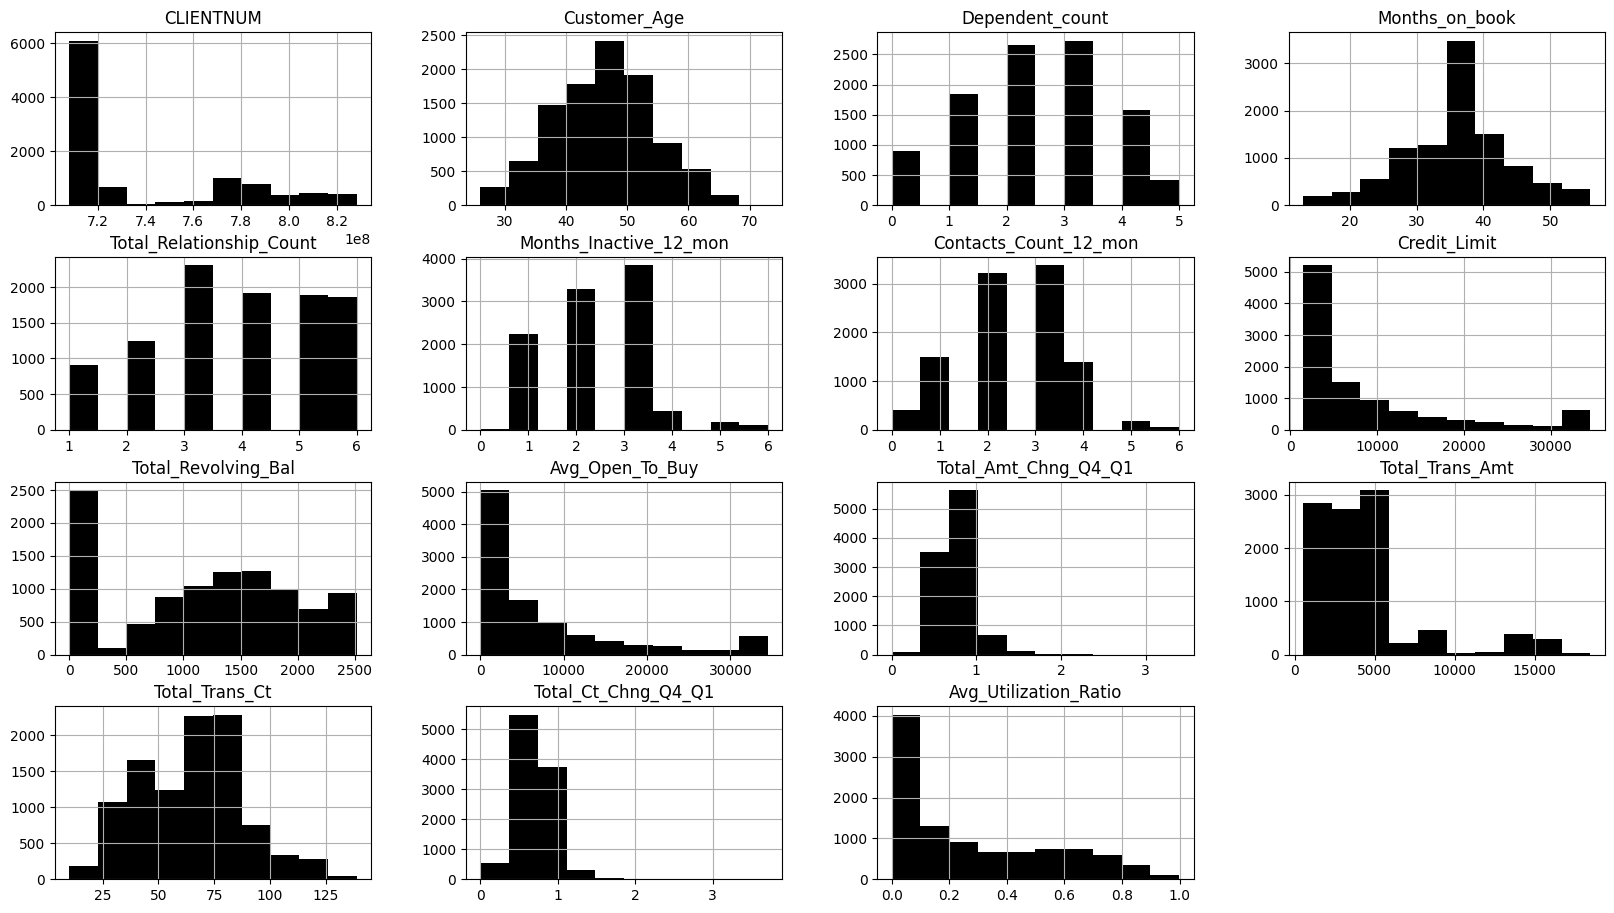

In [13]:
#showing a distribution of numerical columns in the dataset
data.hist(figsize = (20,11), color = 'k')

In [14]:
#checking percentage of target outcomes
data['Attrition_Flag'].value_counts()/len(data)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

<AxesSubplot:>

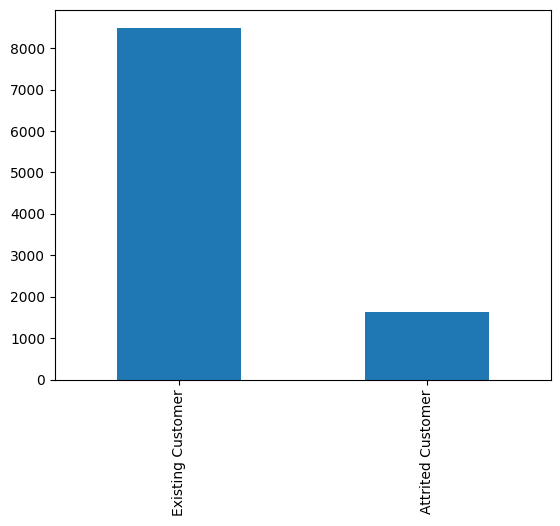

In [15]:
#showing barplot of attrition flag
data['Attrition_Flag'].value_counts().plot.bar()

<AxesSubplot:>

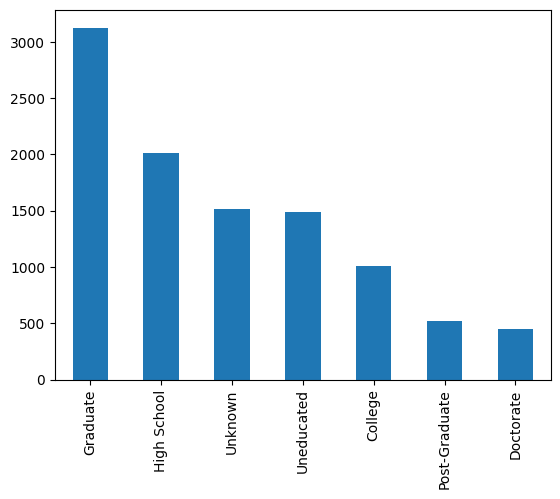

In [16]:
#showing barplot of educational level
data['Education_Level'].value_counts().plot.bar()

<AxesSubplot:>

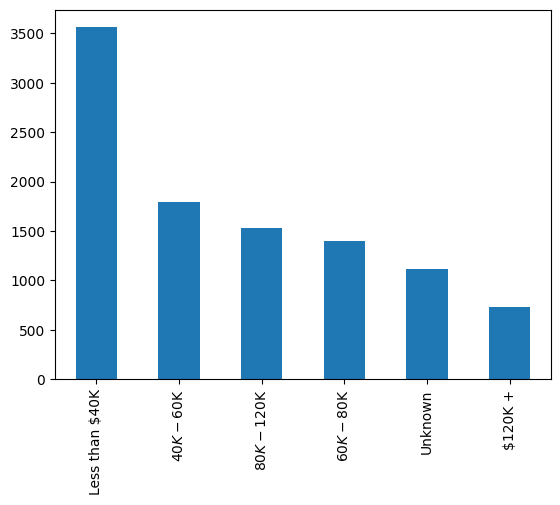

In [17]:
data['Income_Category'].value_counts().plot.bar()

<AxesSubplot:>

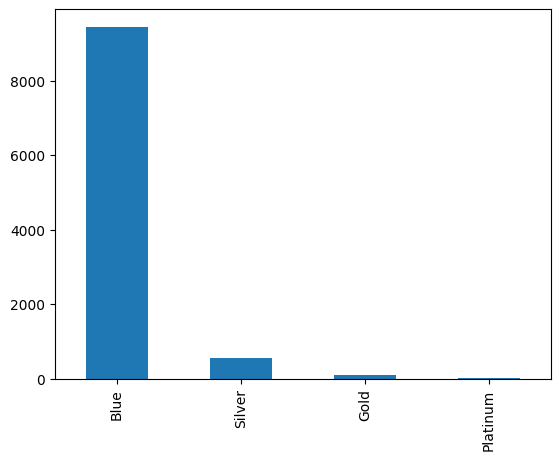

In [18]:
#showing barplot of card category
data['Card_Category'].value_counts().plot.bar()

<AxesSubplot:>

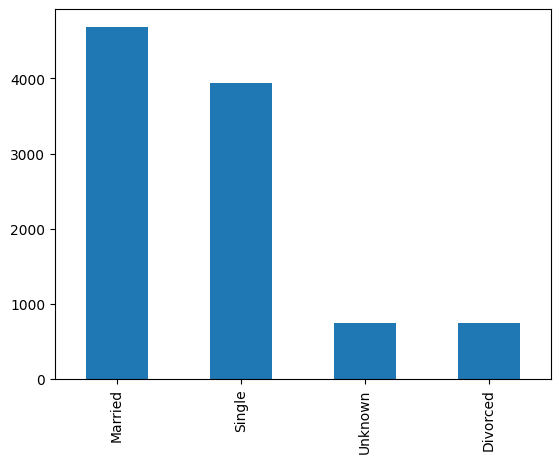

In [19]:
#showing barplot of marital status
data['Marital_Status'].value_counts().plot.bar()

<AxesSubplot:>

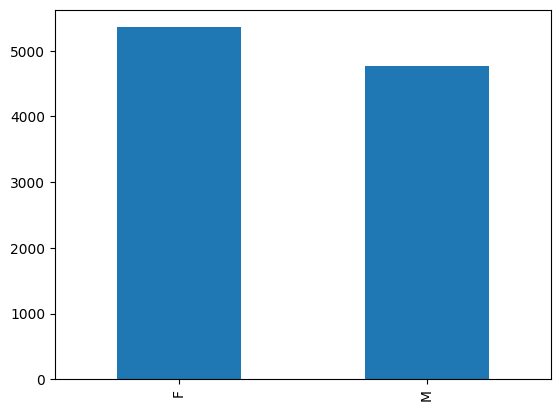

In [20]:
#showing barplot of gender
data['Gender'].value_counts().plot.bar()

Text(0.5, 1.0, 'Credit Limit-Age Distribution')

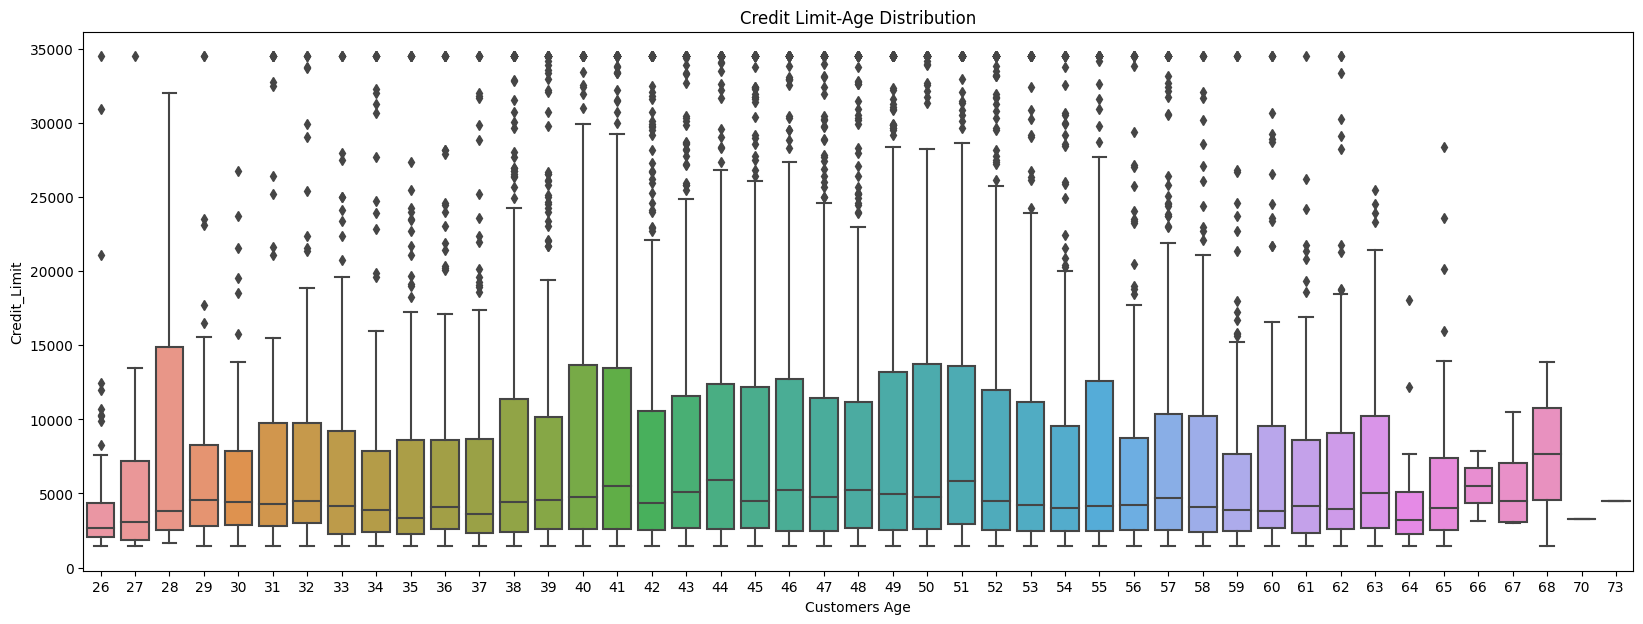

In [21]:
#boxplot of credit limit-age distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=data,y='Credit_Limit',x='Customer_Age')
plt.xlabel('Customers Age')
plt.ylabel('Credit_Limit')
plt.title('Credit Limit-Age Distribution')

Text(0.5, 1.0, 'Credit Limit-Gender Distribution')

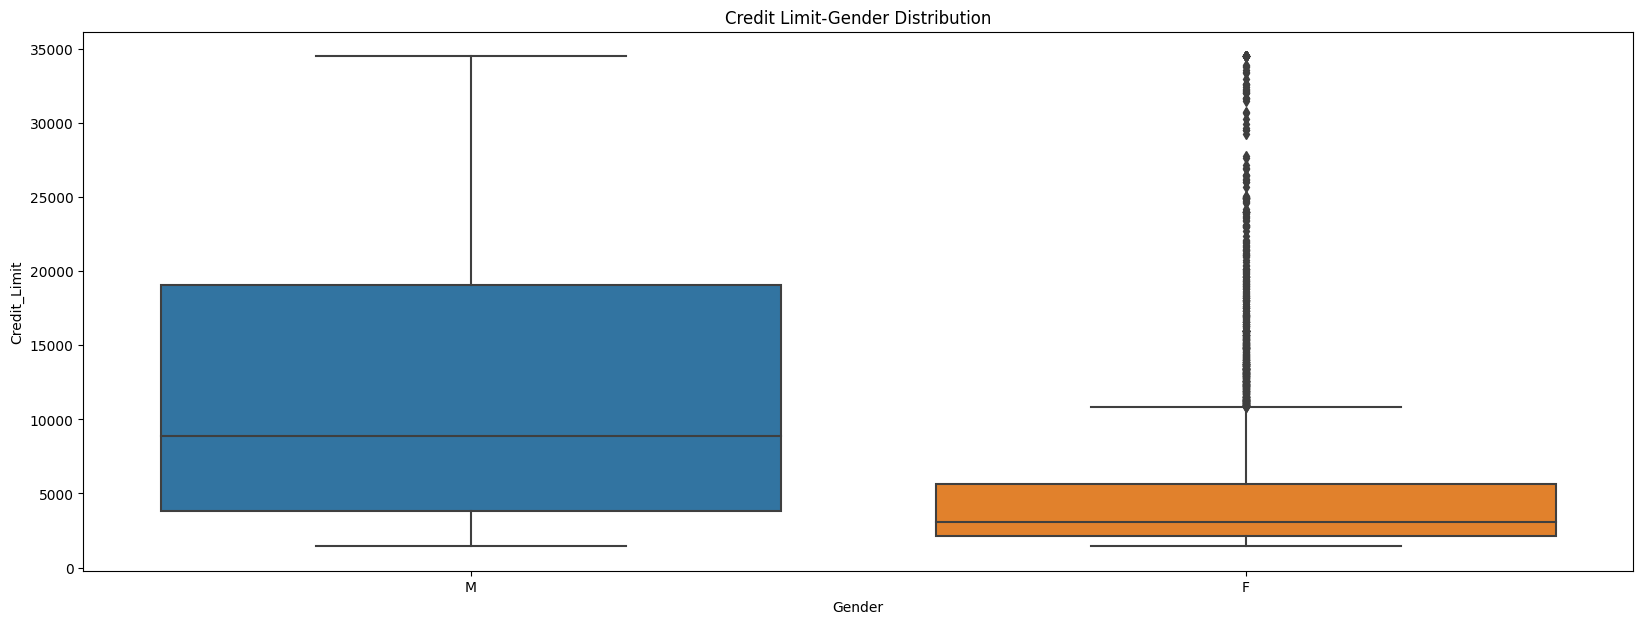

In [22]:
#boxplot of credit limit-gender distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=data,y='Credit_Limit',x='Gender')
plt.xlabel('Gender')
plt.ylabel('Credit_Limit')
plt.title('Credit Limit-Gender Distribution')

Text(0.5, 1.0, 'Credit Limit-Income Distribution')

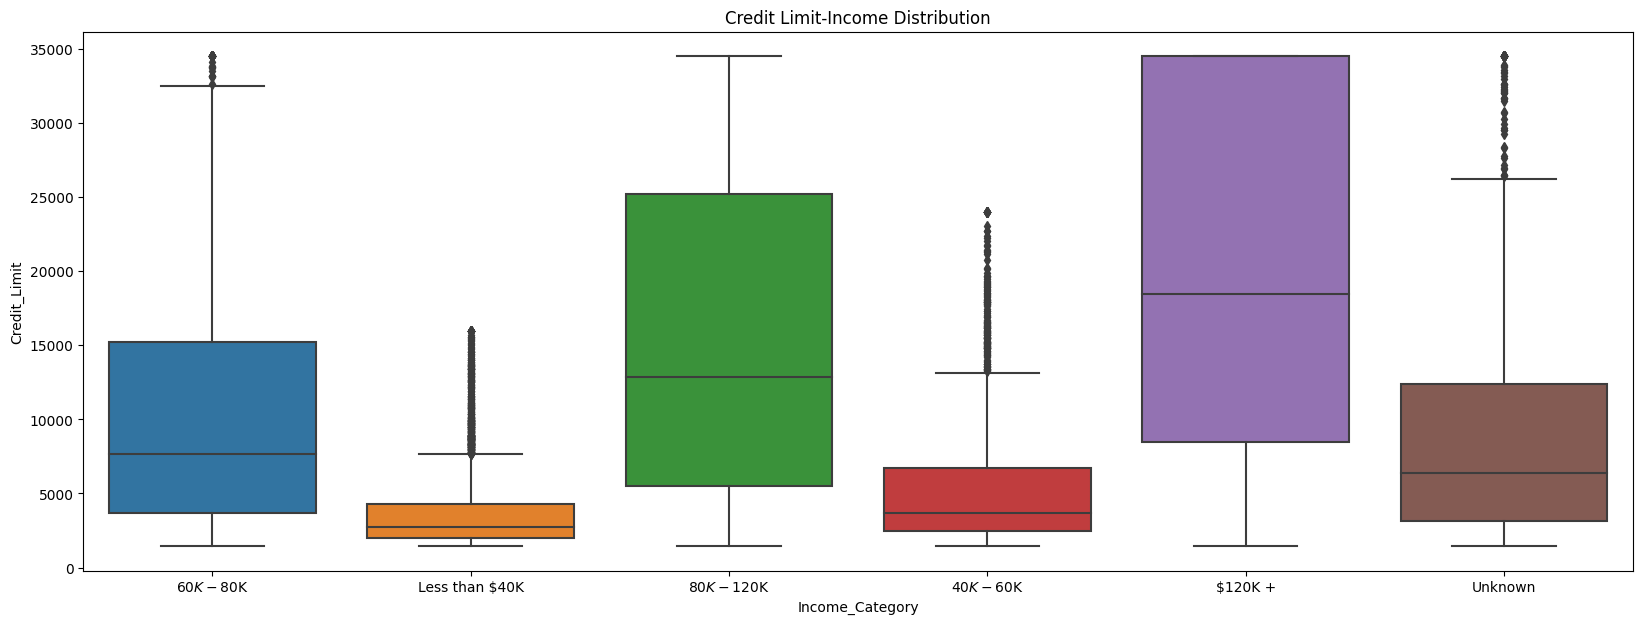

In [23]:
#boxplot of credit limit-income distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=data,y='Credit_Limit',x='Income_Category')
plt.xlabel('Income_Category')
plt.ylabel('Credit_Limit')
plt.title('Credit Limit-Income Distribution')

Text(0.5, 1.0, 'Credit Limit-Marital_Status Distribution')

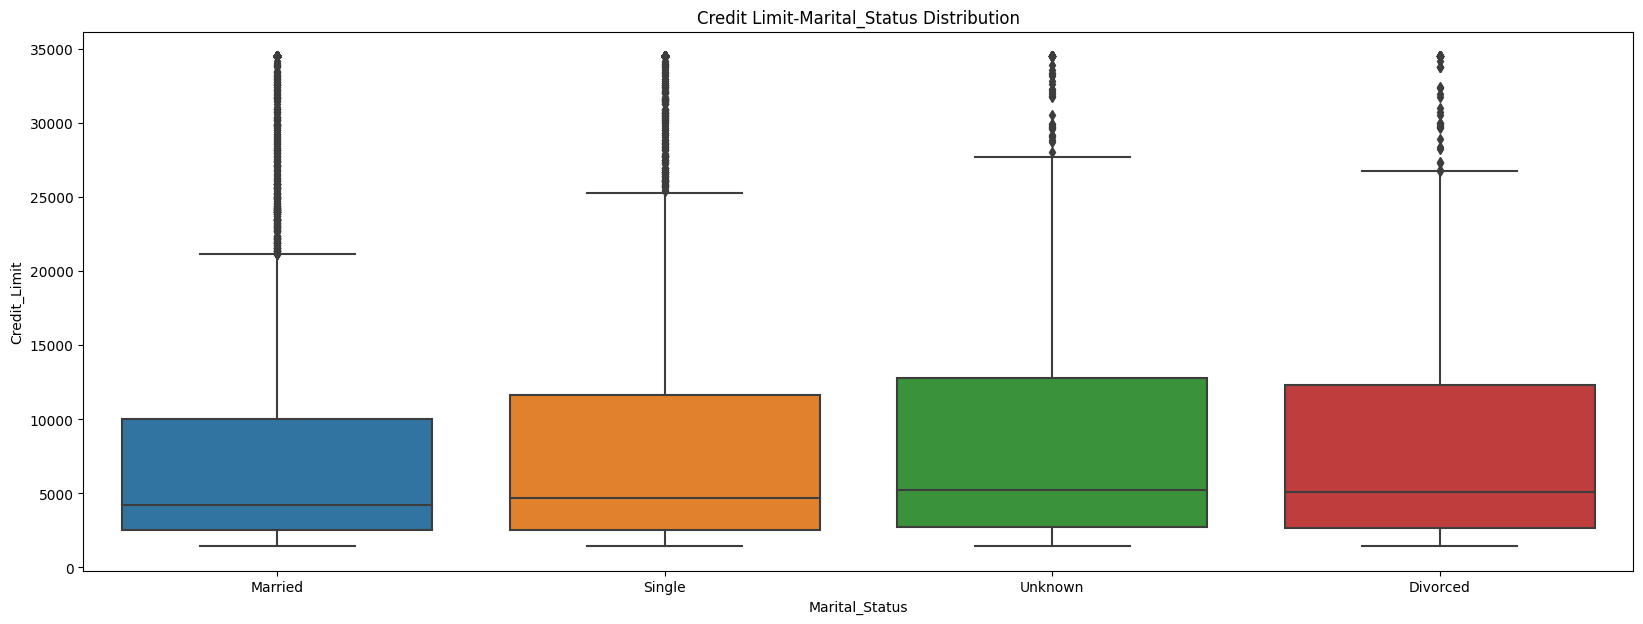

In [24]:
#boxplot of credit limit-marital status distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=data,y='Credit_Limit',x='Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Credit_Limit')
plt.title('Credit Limit-Marital_Status Distribution')

Text(0.5, 1.0, 'Credit Limit-Card_Category Distribution')

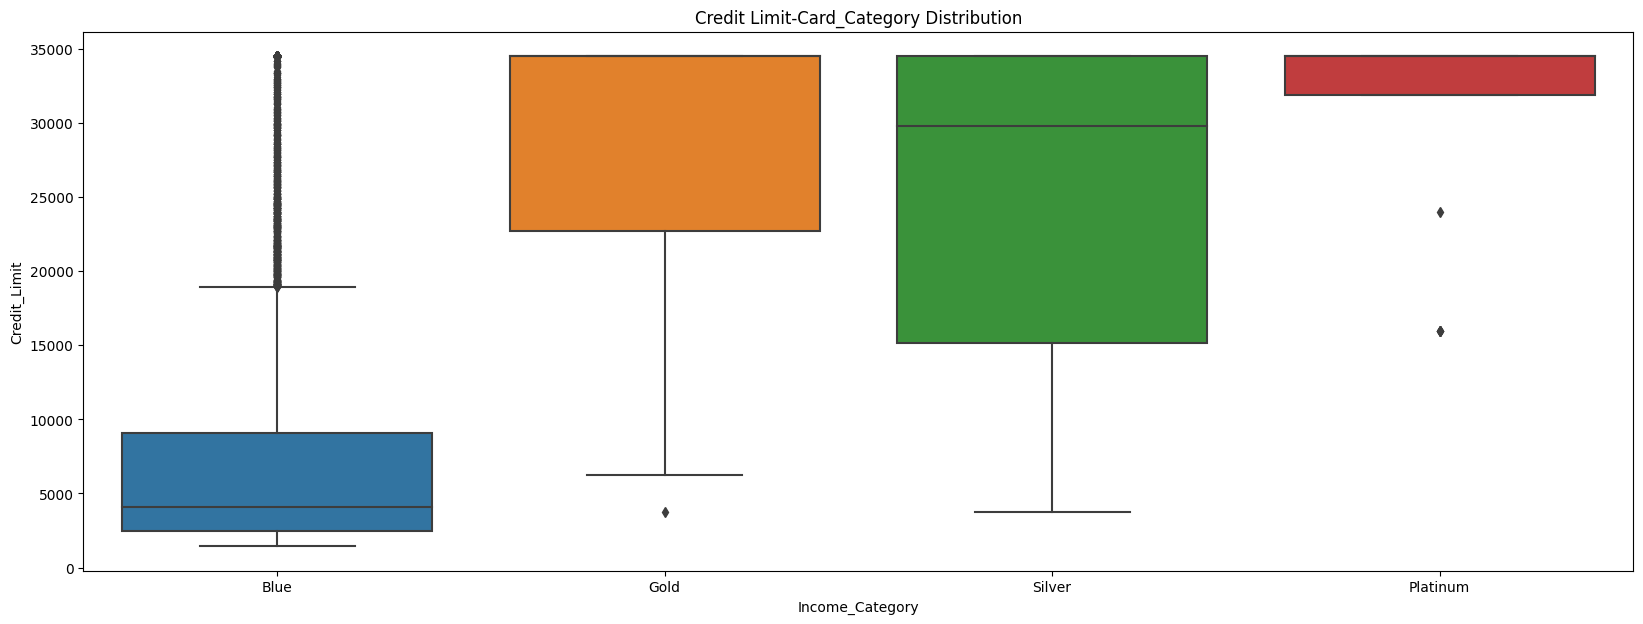

In [25]:
#boxplot of credit limit-card category distribution
plt.figure(figsize=(20,7))
sns.boxplot(data=data,y='Credit_Limit',x='Card_Category')
plt.xlabel('Income_Category')
plt.ylabel('Credit_Limit')
plt.title('Credit Limit-Card_Category Distribution')

In [26]:
#crosstable of gender and attrition flag columns
pd.crosstab(data['Gender'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


Text(0, 0.5, 'Percentage')

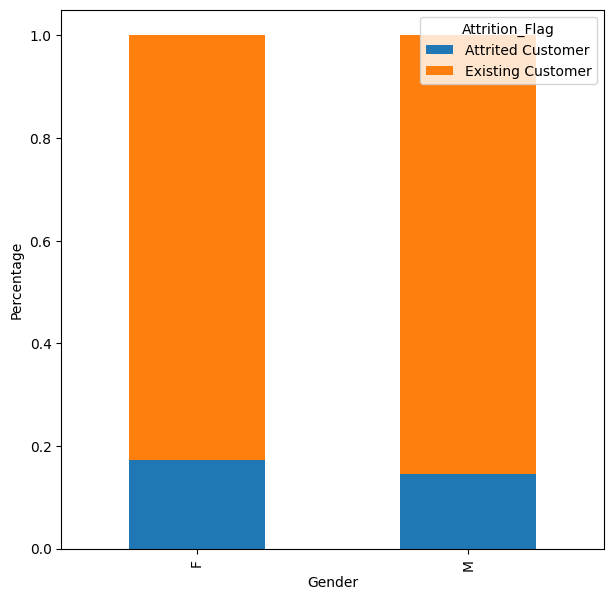

In [27]:
gen_bar = pd.crosstab(data['Gender'], data['Attrition_Flag'])
gen_bar.div(gen_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7,7))
plt.xlabel('Gender')
plt.ylabel('Percentage')

In [28]:
#crosstable of education level and attrition flag columns
pd.crosstab(data['Education_Level'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


Text(0, 0.5, 'Percentage')

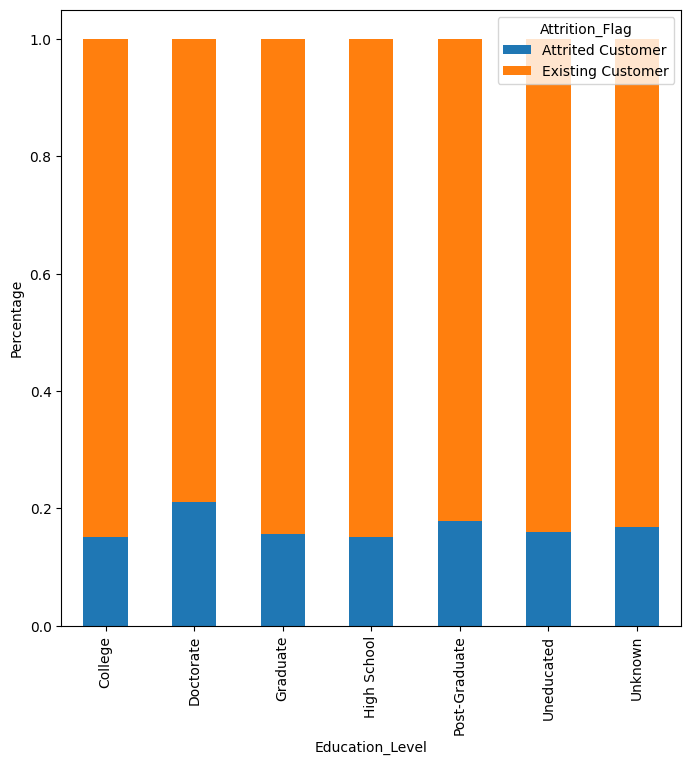

In [29]:
edu_bar = pd.crosstab(data['Education_Level'], data['Attrition_Flag'])
edu_bar.div(edu_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.xlabel('Education_Level')
plt.ylabel('Percentage')

In [30]:
#crosstable of marital status and attrition flag columns
pd.crosstab(data['Marital_Status'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


Text(0, 0.5, 'Percentage')

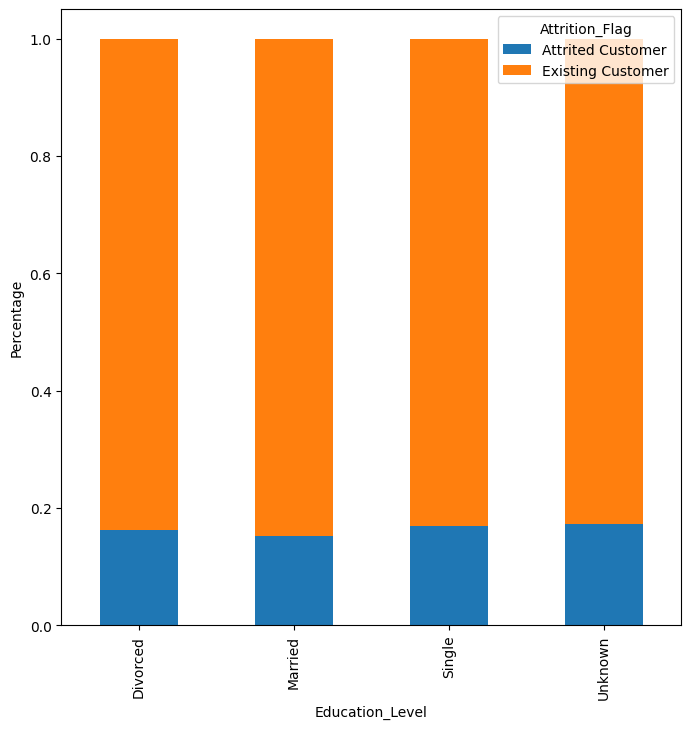

In [31]:
mar_bar = pd.crosstab(data['Marital_Status'], data['Attrition_Flag'])
mar_bar.div(mar_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.xlabel('Education_Level')
plt.ylabel('Percentage')

In [32]:
#crosstable of card category and attrition flag columns
pd.crosstab(data['Card_Category'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


Text(0, 0.5, 'Percentage')

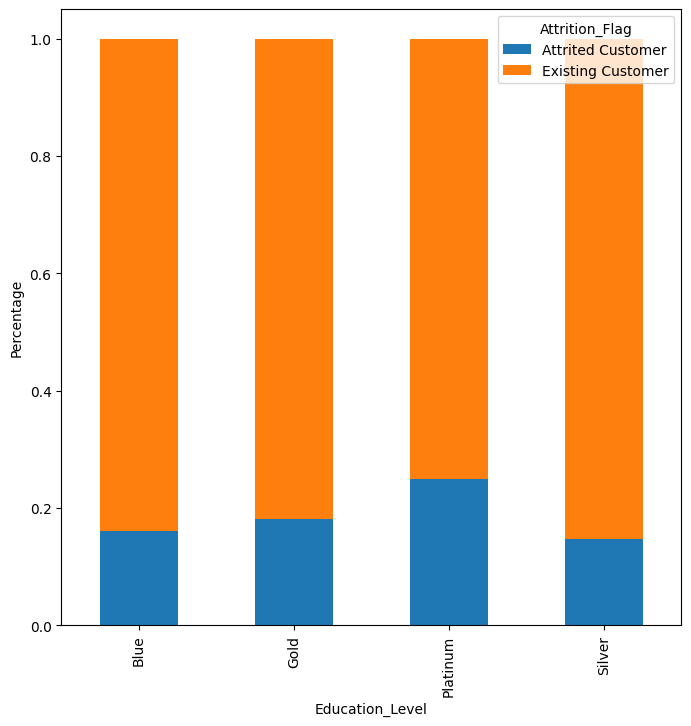

In [33]:
car_bar = pd.crosstab(data['Card_Category'], data['Attrition_Flag'])
car_bar.div(car_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.xlabel('Education_Level')
plt.ylabel('Percentage')

In [34]:
#crosstable of income category and attrition flag columns
pd.crosstab(data['Income_Category'], data['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


Text(0, 0.5, 'Percentage')

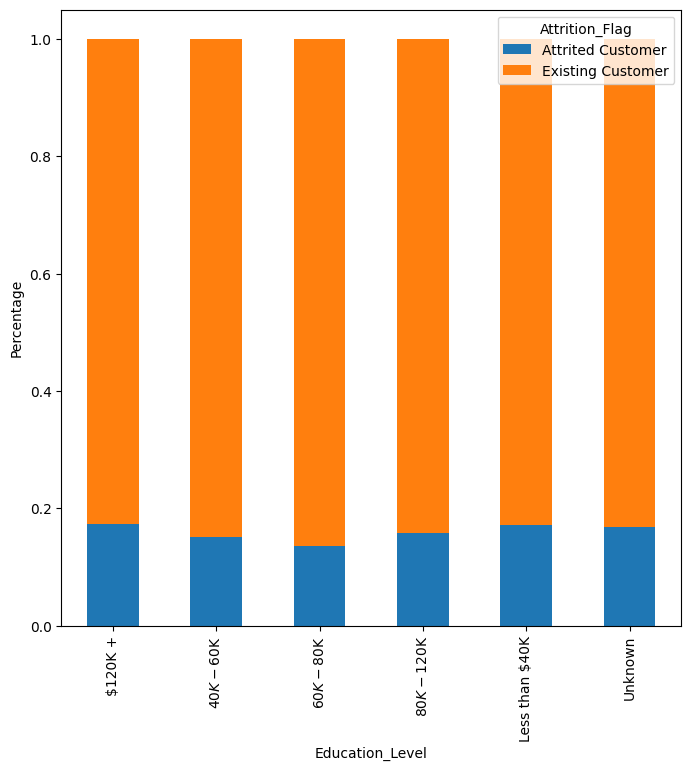

In [35]:
inc_bar = pd.crosstab(data['Income_Category'], data['Attrition_Flag'])
inc_bar.div(inc_bar.sum(axis = 1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8,8))
plt.xlabel('Education_Level')
plt.ylabel('Percentage')

# Feature Engineering

In [36]:
#encoding categorical columns
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Education_Level'] = le.fit_transform(data['Education_Level'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])
data['Income_Category'] = le.fit_transform(data['Income_Category'])
data['Card_Category'] = le.fit_transform(data['Card_Category'])

In [37]:
#encoding target outcome
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})

In [38]:
#correlations among features in dataset
correlation = data.corr()
print(correlation['Attrition_Flag'].sort_values(ascending=False))

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
CLIENTNUM                   0.046430
Gender                      0.037272
Credit_Limit                0.023873
Card_Category               0.006038
Avg_Open_To_Buy             0.000285
Education_Level            -0.005551
Months_on_book             -0.013687
Income_Category            -0.017584
Customer_Age               -0.018203
Marital_Status             -0.018597
Dependent_count            -0.018991
Months_Inactive_12_mon     -0.152449
Contacts_Count_12_mon      -0.204491
Name: Attrition_Flag, dtype: float64


<AxesSubplot:>

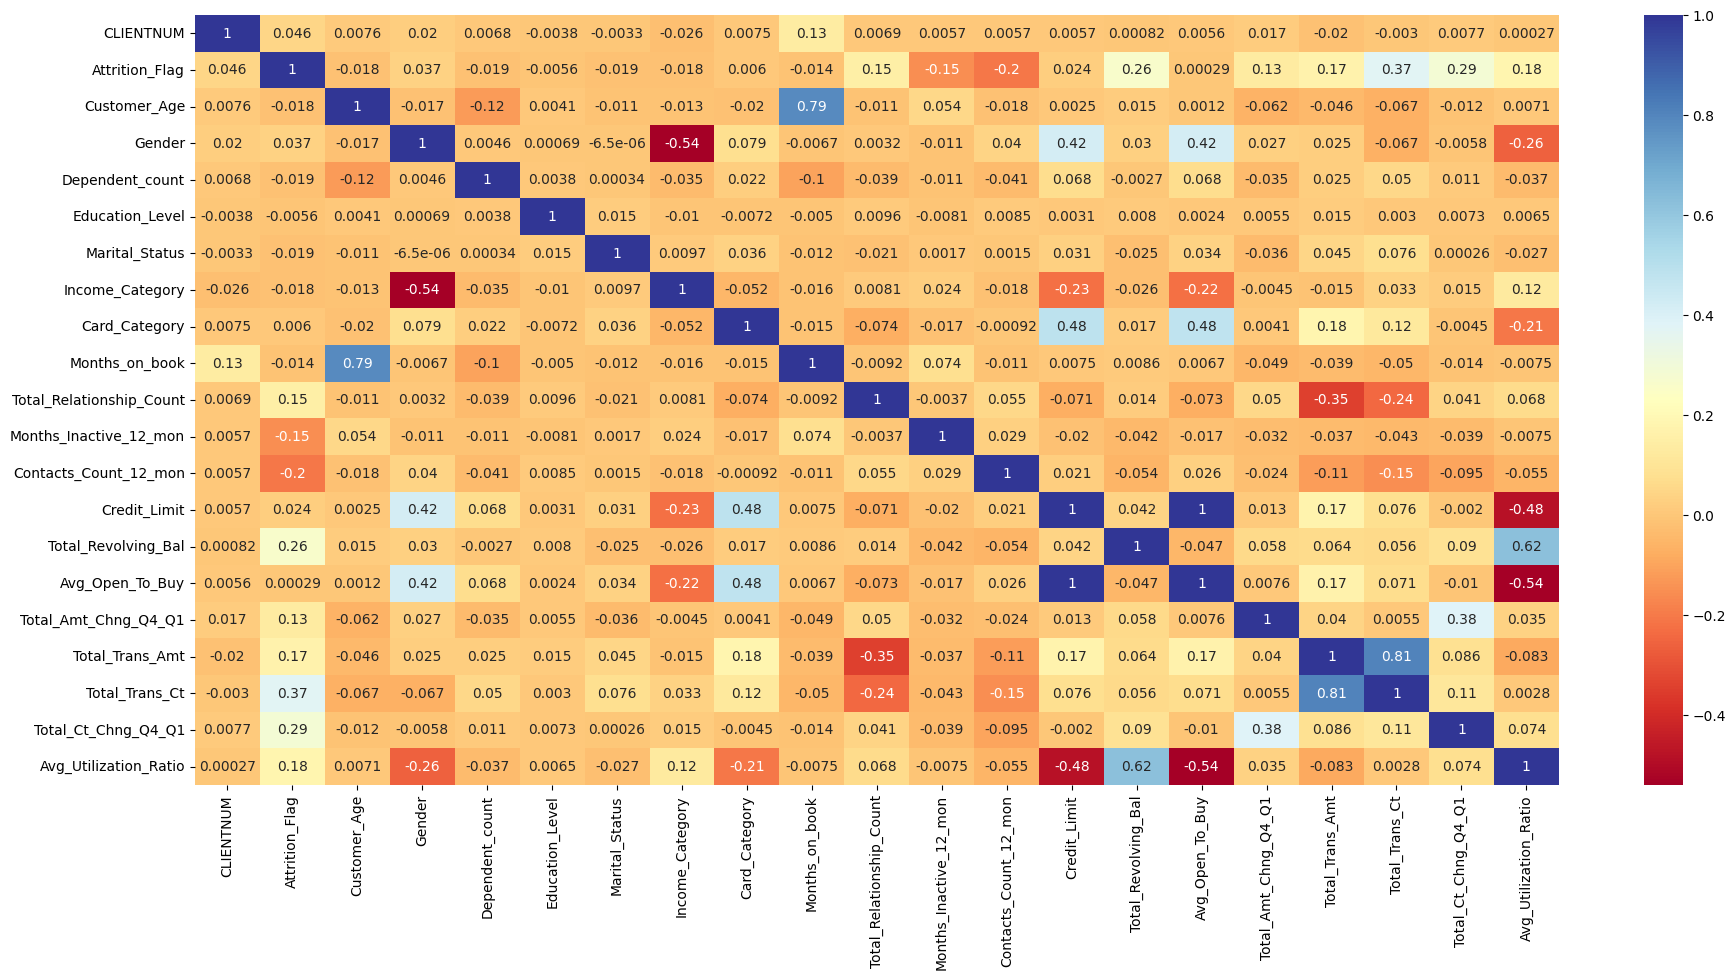

In [39]:
#heatmap of correlations in dataset
plt.figure(figsize = (22,10))
sns.heatmap(correlation, annot=True,cmap='RdYlBu')

In [40]:
#dropping irrelevant columns
data = data.drop(columns = ['CLIENTNUM','Total_Trans_Ct','Months_on_book',])

In [41]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,5,1,3,12691.0,777,11914.0,1.335,1144,1.625,0.061
1,1,49,0,5,2,2,4,0,6,1,2,8256.0,864,7392.0,1.541,1291,3.714,0.105
2,1,51,1,3,2,1,3,0,4,1,0,3418.0,0,3418.0,2.594,1887,2.333,0.000
3,1,40,0,4,3,3,4,0,3,4,1,3313.0,2517,796.0,1.405,1171,2.333,0.760
4,1,40,1,3,5,1,2,0,5,1,0,4716.0,0,4716.0,2.175,816,2.500,0.000


In [42]:
# Defining the target & predictor variables 
X = data.drop('Attrition_Flag', axis = 1)
y = data['Attrition_Flag']

In [43]:
# Resampling the dataframe using SMOTE
smote = SMOTE(sampling_strategy=0.6)
X, y = smote.fit_resample(X, y)
y.value_counts()

1    8500
0    5100
Name: Attrition_Flag, dtype: int64

In [44]:
#splitting target and predictor variables into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

### Logistic Regression

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)

In [47]:
#classification report of model
print('Report:', classification_report(y_test, prediction))

Report:               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1487
           1       0.83      0.88      0.86      2593

    accuracy                           0.81      4080
   macro avg       0.80      0.79      0.79      4080
weighted avg       0.81      0.81      0.81      4080



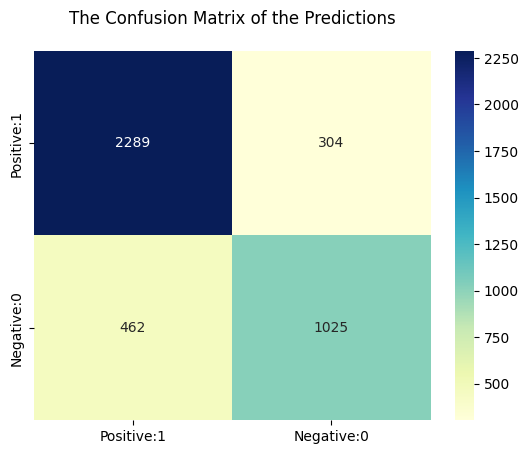

In [48]:
#confusion matrix of logistic regression
cm = confusion_matrix(y_test, prediction, labels=[1, 0])
cm_matrix = pd.DataFrame(data=cm, columns=['Positive:1', 'Negative:0'], index=['Positive:1', 'Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions", y = 1.05)
plt.show()

### Decision Tree Classifier

In [49]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y_train)
prediction_clf = clf.predict(X_test)

In [50]:
#classification report of model
print('Report:', classification_report(y_test, prediction_clf))

Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1487
           1       0.96      0.93      0.94      2593

    accuracy                           0.93      4080
   macro avg       0.92      0.93      0.92      4080
weighted avg       0.93      0.93      0.93      4080



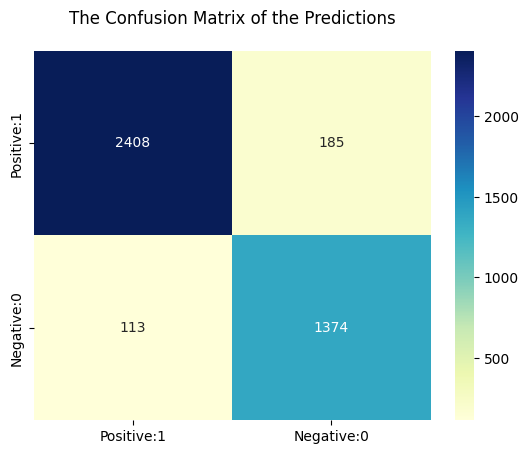

In [51]:
#confudion matrix of decision tree classifier
cm_dt = confusion_matrix(y_test, prediction_clf, labels=[1, 0])
cm_matrix_dt = pd.DataFrame(data=cm_dt, columns=['Positive:1', 'Negative:0'], index=['Positive:1', 'Negative:0'])
sns.heatmap(cm_matrix_dt, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions", y = 1.05)
plt.show()

### Random Forest Classifier

In [52]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
prediction_rf = rf_model.predict(X_test)

In [53]:
#classification report of model
print('Report:', classification_report(y_test, prediction_rf))

Report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1487
           1       0.97      0.97      0.97      2593

    accuracy                           0.96      4080
   macro avg       0.96      0.96      0.96      4080
weighted avg       0.96      0.96      0.96      4080



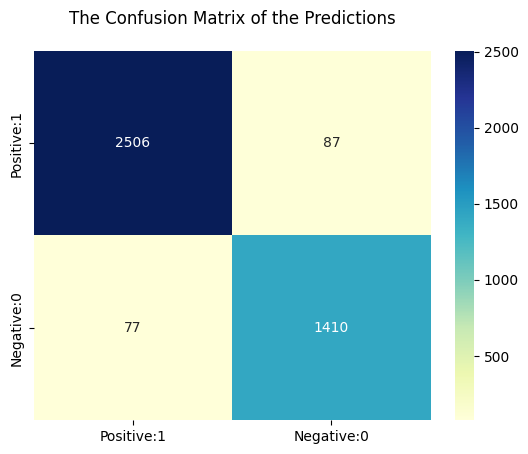

In [54]:
#confusion matrix of random forest classifier
cm_rf = confusion_matrix(y_test, prediction_rf, labels=[1, 0])
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Positive:1', 'Negative:0'], index=['Positive:1', 'Negative:0'])
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions", y = 1.05)
plt.show()

In [55]:
def feature_importance(model,data):
    return pd.DataFrame({'Columns': X.columns,'importance':model.feature_importances_}).sort_values(by='importance',ascending=False)

In [56]:
feature_importance(rf_model,X_train)

,Columns,importance
14,Total_Trans_Amt,0.281981
15,Total_Ct_Chng_Q4_Q1,0.128920
11,Total_Revolving_Bal,0.126616
16,Avg_Utilization_Ratio,0.081935
13,Total_Amt_Chng_Q4_Q1,0.073356
7,Total_Relationship_Count,0.070210
0,Customer_Age,0.041369
12,Avg_Open_To_Buy,0.038129
10,Credit_Limit,0.036971
8,Months_Inactive_12_mon,0.021761


Text(0.5, 1.0, 'Feature Importance based on Random Forest Model')

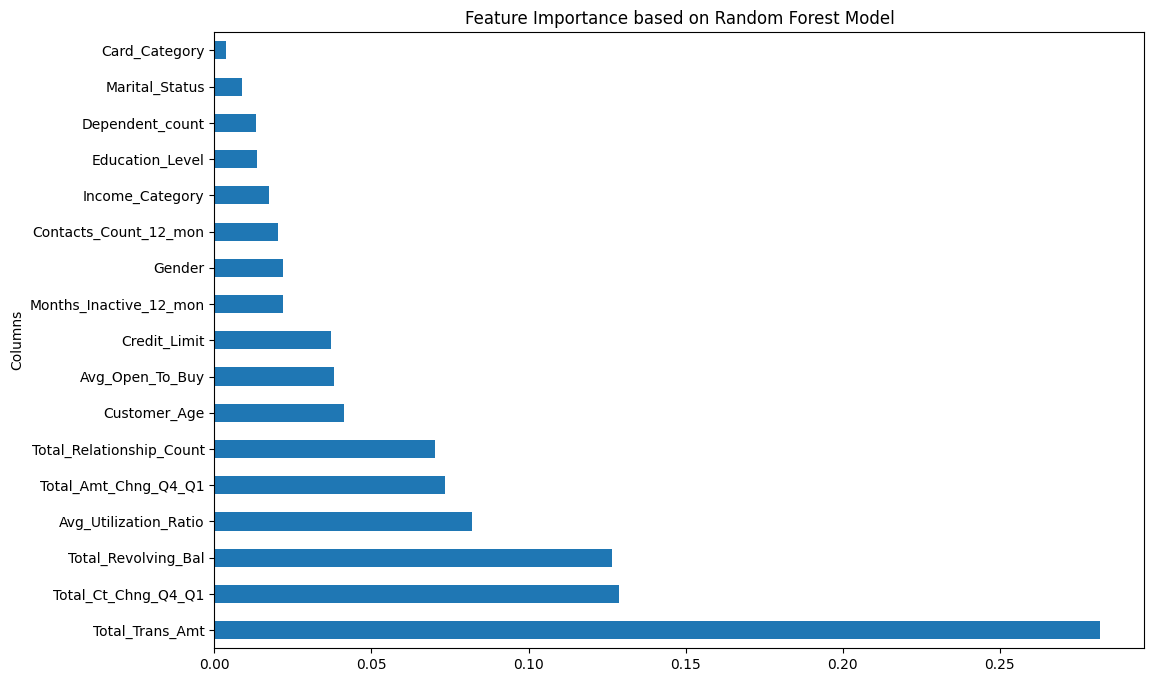

In [57]:
#plotting feature importances
feature_importance(rf_model,X_train).plot('Columns','importance','barh',
                                    figsize=(12,8),legend=False)
plt.title('Feature Importance based on Random Forest Model')